In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Librerias
import os
from pandas import read_csv
%matplotlib inline

import numpy as np
import pandas as pd
#graficas
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
ata = read_csv("/content/drive/MyDrive/Maestria/Proyecto Integrador 2/Modelos Finales/Data Set 1 corporate_rating.csv")

PREPARACION DE DATOS

In [ ]:
data.Rating.value_counts()

BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: Rating, dtype: int64

Observamos que el conjunto de datos está muy desequilibrado. Tenemos 671 BBB pero solo 1 D. Sin embargo, estamos trabajando con calificaciones de diferentes compañías como Moody's, Standard & Poor's y más. Se decide simplificar las etiquetas, de acuerdo con el riesgo de clasificación.

In [ ]:
rating_dict = {'AAA':'Lowest Risk',
               'AA':'Low Risk',
               'A':'Low Risk',
               'BBB':'Medium Risk',
               'BB':'High Risk',
               'B':'High Risk',
               'CCC':'Highest Risk',
               'CC':'Highest Risk',
               'C':'Highest Risk',
               'D':'In Default'}

data.Rating = data.Rating.map(rating_dict)

Pasamos de 10 etiquetas a 6 etiquetas

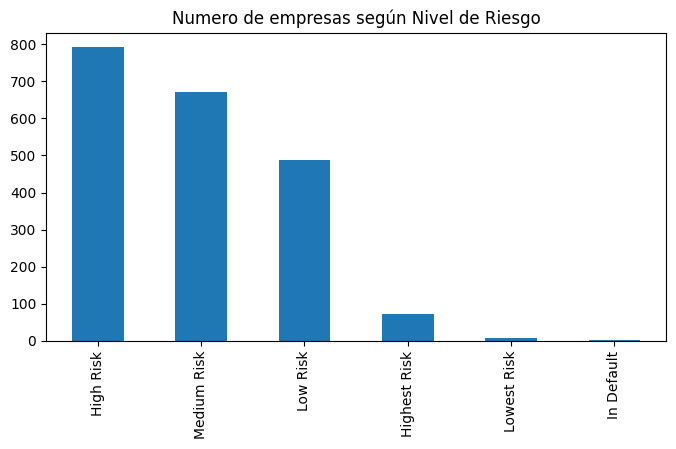

In [ ]:
import matplotlib.pyplot as plt

# Crear la gráfica
ax = data['Rating'].value_counts().plot(kind='bar',
                                       figsize=(8, 4),
                                       title="Numero de empresas según Nivel de Riesgo")

# Ajustar el color de fondo a blanco
ax.set_facecolor('white')

# Eliminar la cuadrícula
ax.grid(False)

# Mostrar la gráfica
plt.show()


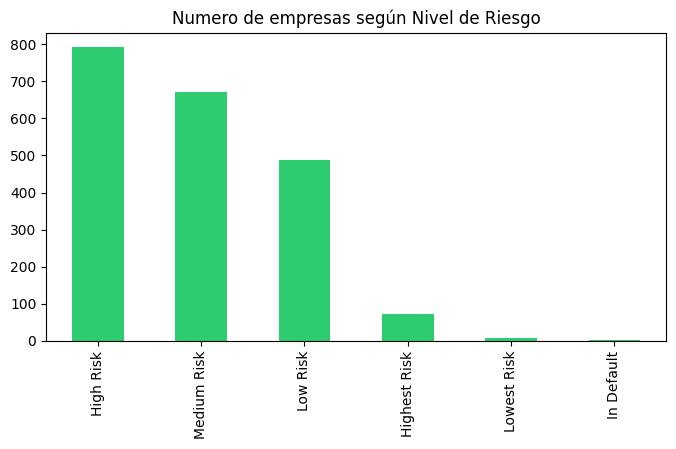

In [ ]:
import matplotlib.pyplot as plt

# Crear la gráfica con barras de color verde
ax = data['Rating'].value_counts().plot(kind='bar',
                                       figsize=(8, 4),
                                       title="Numero de empresas según Nivel de Riesgo",
                                       color='#2ecc71')  # Código hexadecimal para el color verde

# Ajustar el color de fondo a blanco
ax.set_facecolor('white')

# Eliminar la cuadrícula
ax.grid(False)

# Mostrar la gráfica
plt.show()


Se mantiene  la falta de Calificaciones Crediticias clasificadas como de Menor Riesgo y En Default tendremos que eliminarlas de la tabla.

In [ ]:
data = data[data['Rating']!='Lowest Risk'] # filter Lowest Risk
data = data[data['Rating']!='In Default']  # filter In Default
data.reset_index(inplace = True, drop=True) # reset index

In [ ]:
data.Rating.value_counts()

High Risk       792
Medium Risk     671
Low Risk        487
Highest Risk     71
Name: Rating, dtype: int64

In [ ]:
# Statistical summary con el data set agregado y depurado
data.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2.021000e+03,2.021000e+03,2021.000000,2021.000000,2021.000000,2.021000e+03,2021.000000,2021.000000
mean,3.535411,2.657150,0.669048,334.855415,0.278725,0.432721,0.496900,0.588793,-37.666843,-74.267283,...,0.400755,0.408272,5.114871e+03,4.244248e+03,3.335166,0.438715,48.426558,6.540891e+03,1.452142,38.138233
std,44.139386,33.009920,3.590902,4456.606352,6.076128,9.002733,0.525996,11.246798,1168.476782,2354.920503,...,10.613711,3.803929,1.472059e+05,1.226418e+05,87.702375,9.002047,530.161001,1.778797e+05,19.521704,760.421855
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-100.611015,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
25%,1.071930,0.602298,0.131433,22.806507,0.020894,0.025649,0.232565,0.044546,0.018757,0.028112,...,0.147837,0.269616,4.094118e-01,1.562116e+00,2.050249,0.028057,6.235759,2.348851e+00,0.073664,2.202394
50%,1.492804,0.979094,0.297859,42.281804,0.064323,0.084965,0.414217,0.107640,0.045417,0.074639,...,0.300439,0.644265,2.123062e+00,3.680425e+00,2.657275,0.087424,9.269746,4.361649e+00,0.132758,5.775840
75%,2.160710,1.450457,0.625355,59.165369,0.113871,0.144763,0.849693,0.175334,0.077159,0.135036,...,0.370239,0.836949,4.230253e+00,8.027524e+00,3.665438,0.149355,12.898855,7.322553e+00,0.239359,9.500424
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


MODELAMIENTO Y SELECCION DE MEJOR MODELO

Se abordan los siguientes pasos:

Preparar el conjunto de datos
Dividir en el entrenamiento y la prueba
Transformar/Codificar las etiquetas de las variables
PExplorar diferents modelos de clasificacion
Compara el desempeño de todos los modelos.
Seleccionar un  modelo ganador y ajuste los hiperparámetros para obtener una mayor precisión.
Evaluación detallada de resultado con una matriz de confusión y diferentes medidas.
Características más importantes para predecir la calificación.

Preparacion del Data SET

In [ ]:
from sklearn import preprocessing
#codificar las variables categóricas en las columnas 'Sector' y 'Rating'
le = preprocessing.LabelEncoder()
le.fit(data.Sector)
data.Sector = le.transform(data.Sector) # encode sector
le.fit(data.Rating)
data.Rating = le.transform(data.Rating) # encode rating

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Obtener las columnas categóricas y numéricas
#categorical_cols = ['Sector']  # Agrega aquí las columnas categóricas que deseas incluir
#numeric_cols = data.select_dtypes(include=['number']).columns

# Codificar cada columna categórica seleccionada
#label_encoders = {}
#for col in categorical_cols:
    #le = LabelEncoder()
    #data[col] = le.fit_transform(data[col])
    #label_encoders[col] = le

# Crear un DataFrame con solo las columnas seleccionadas
#data = data[numeric_cols.union(categorical_cols + ['Rating'])]






In [ ]:
unique_labels = data['Rating'].unique()
print(unique_labels)


[2 3 0 1]


In [ ]:
data = data.drop('Name', axis=1)
data = data.drop('Symbol', axis=1)
data = data.drop('Rating Agency Name', axis=1)
data = data.drop('Date', axis=1)
data.head()

Preperacion de Datos y remuestreo de clases

In [ ]:
pip install catboost


In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

# Definir los modelos
models = {
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant': QuadraticDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(iterations=100, random_state=42)
}

#  datos originales
X = data.drop('Rating', axis=1)
y = data['Rating']

# Inicializar el método de oversampling (SMOTE)
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Inicializar StratifiedKFold para la validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop sobre los modelos
for model_name, model in models.items():
    print(f"Modelo: {model_name}")

    # Loop sobre las divisiones de la validación cruzada
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Aplicar SMOTE solo en el conjunto de entrenamiento
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

        # Ajustar el modelo con los datos remuestreados
        model.fit(X_resampled, y_resampled)

        # Realizar predicciones en el conjunto de prueba
        y_pred = model.predict(X_test)

        # Calcular y mostrar métricas
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        conf_matrix = confusion_matrix(y_test, y_pred)

         # Almacenar el modelo entrenado
        #trained_models[model_name] = model


        print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
        print('Confusion Matrix:')
        print(conf_matrix)
        print('\n---\n')

    print('\n====================\n')


Modelo: XGBoost
Accuracy: 0.6593, Precision: 0.6678, Recall: 0.6593, F1 Score: 0.6624
Confusion Matrix:
[[112  16   6  24]
 [ 11   3   1   0]
 [  7   0  72  19]
 [ 22   2  30  80]]

---

Accuracy: 0.6411, Precision: 0.6291, Recall: 0.6411, F1 Score: 0.6339
Confusion Matrix:
[[122   5   7  24]
 [  8   1   2   3]
 [ 10   0  59  29]
 [ 31   0  26  77]]

---

Accuracy: 0.6510, Precision: 0.6518, Recall: 0.6510, F1 Score: 0.6512
Confusion Matrix:
[[113   5   8  32]
 [  9   5   0   0]
 [  6   1  63  27]
 [ 30   2  21  82]]

---

Accuracy: 0.6658, Precision: 0.6752, Recall: 0.6658, F1 Score: 0.6692
Confusion Matrix:
[[113  12   7  27]
 [  9   4   1   0]
 [  3   0  65  29]
 [ 17   0  30  87]]

---

Accuracy: 0.6312, Precision: 0.6344, Recall: 0.6312, F1 Score: 0.6320
Confusion Matrix:
[[104   8  14  33]
 [  9   5   0   0]
 [  6   0  64  27]
 [ 27   0  25  82]]

---



Modelo: Gradient Boosting
Accuracy: 0.5802, Precision: 0.5962, Recall: 0.5802, F1 Score: 0.5852
Confusion Matrix:
[[97 17 13 31

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.2921, Precision: 0.5206, Recall: 0.2921, F1 Score: 0.2365
Confusion Matrix:
[[ 20  34  96   8]
 [  2   4   7   1]
 [  2  10  84   2]
 [  3  21 100  10]]

---

Accuracy: 0.3119, Precision: 0.4778, Recall: 0.3119, F1 Score: 0.2378
Confusion Matrix:
[[ 14  18 107  19]
 [  1   8   2   3]
 [  0   5  88   4]
 [  5   3 111  16]]

---

Accuracy: 0.2649, Precision: 0.3594, Recall: 0.2649, F1 Score: 0.1974
Confusion Matrix:
[[ 11  45  84  19]
 [  6   4   2   2]
 [  3   5  82   7]
 [  2  22 100  10]]

---

Accuracy: 0.2649, Precision: 0.4076, Recall: 0.2649, F1 Score: 0.2066
Confusion Matrix:
[[ 15  47  84  13]
 [  3   7   1   3]
 [  2  14  76   5]
 [  5  17 103   9]]

---



Modelo: KNN


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.4593, Precision: 0.5089, Recall: 0.4593, F1 Score: 0.4648
Confusion Matrix:
[[69 23 29 37]
 [ 4  8  1  2]
 [11  7 67 13]
 [27 19 46 42]]

---

Accuracy: 0.4802, Precision: 0.5108, Recall: 0.4802, F1 Score: 0.4878
Confusion Matrix:
[[83 18 32 25]
 [ 6  3  2  3]
 [14  5 59 20]
 [39 11 35 49]]

---

Accuracy: 0.4975, Precision: 0.5256, Recall: 0.4975, F1 Score: 0.4994
Confusion Matrix:
[[79 23 24 32]
 [ 4  7  3  0]
 [12  3 66 16]
 [37  6 43 49]]

---

Accuracy: 0.4926, Precision: 0.5392, Recall: 0.4926, F1 Score: 0.5008
Confusion Matrix:
[[70 27 30 32]
 [ 4  3  5  2]
 [12  4 69 12]
 [29  6 42 57]]

---

Accuracy: 0.4926, Precision: 0.5282, Recall: 0.4926, F1 Score: 0.5002
Confusion Matrix:
[[81 19 31 28]
 [ 5  6  0  3]
 [13  3 59 22]
 [28  9 44 53]]

---



Modelo: CatBoost
Learning rate set to 0.5
0:	learn: 1.1869452	total: 36.2ms	remaining: 3.58s
1:	learn: 1.0747224	total: 65.5ms	remaining: 3.21s
2:	learn: 1.0039621	total: 95.3ms	remaining: 3.08s
3:	learn: 0.9351228	total: 1

Variables are collinear
Variables are collinear


Learning rate set to 0.5
0:	learn: 1.1869452	total: 18.5ms	remaining: 1.83s
1:	learn: 1.0747224	total: 33.4ms	remaining: 1.64s
2:	learn: 1.0039621	total: 49.5ms	remaining: 1.6s
3:	learn: 0.9351228	total: 64.5ms	remaining: 1.55s
4:	learn: 0.8855838	total: 80.2ms	remaining: 1.52s
5:	learn: 0.8525718	total: 94.3ms	remaining: 1.48s
6:	learn: 0.8156336	total: 109ms	remaining: 1.45s
7:	learn: 0.7970459	total: 123ms	remaining: 1.41s
8:	learn: 0.7655293	total: 137ms	remaining: 1.39s
9:	learn: 0.7379580	total: 152ms	remaining: 1.36s
10:	learn: 0.7208394	total: 165ms	remaining: 1.34s
11:	learn: 0.7072292	total: 181ms	remaining: 1.32s
12:	learn: 0.6863622	total: 196ms	remaining: 1.31s
13:	learn: 0.6677718	total: 213ms	remaining: 1.31s
14:	learn: 0.6519275	total: 229ms	remaining: 1.3s
15:	learn: 0.6312341	total: 243ms	remaining: 1.28s
16:	learn: 0.6143870	total: 257ms	remaining: 1.25s
17:	learn: 0.5967227	total: 271ms	remaining: 1.23s
18:	learn: 0.5841212	total: 285ms	remaining: 1.21s
19:	learn: 0

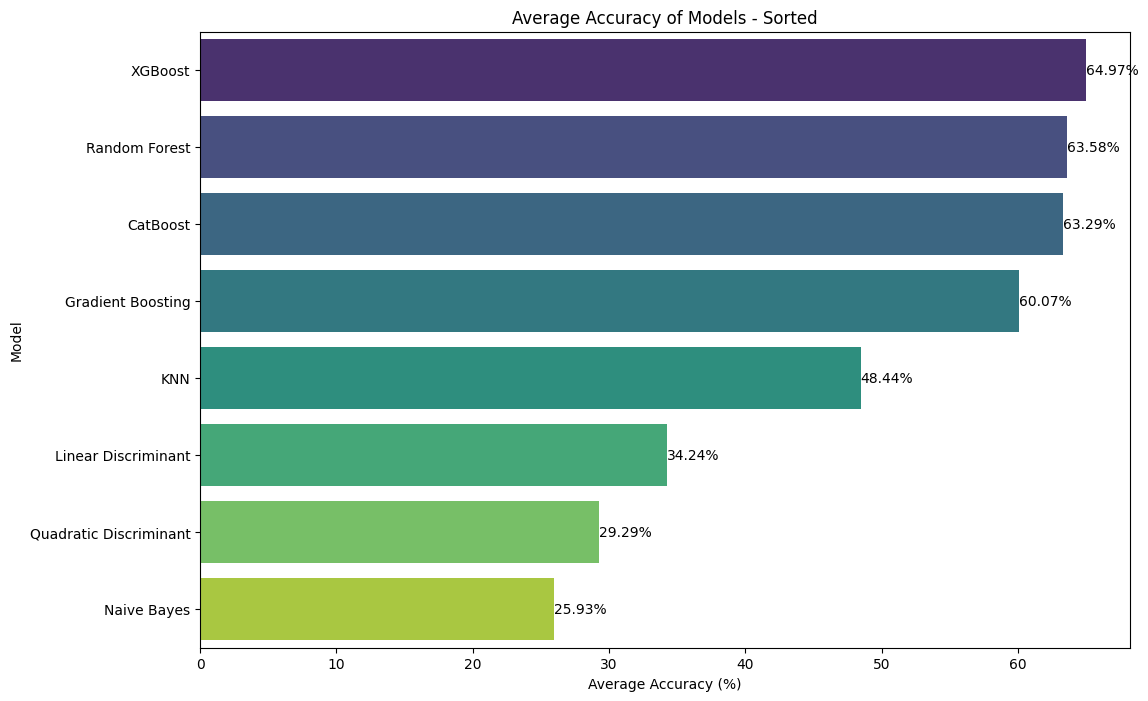

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista para almacenar los resultados
results_list = []

# Loop sobre los modelos y calcular el accuracy promedio
for model_name, model in models.items():
    accuracies = []

    # Loop sobre las divisiones de la validación cruzada
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Aplicar SMOTE solo en el conjunto de entrenamiento
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

        # Ajustar el modelo con los datos remuestreados
        model.fit(X_resampled, y_resampled)

        # Realizar predicciones en el conjunto de prueba
        y_pred = model.predict(X_test)

        # Calcular y almacenar el accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Calcular el accuracy promedio para este modelo
    avg_accuracy = sum(accuracies) / len(accuracies)

    # Almacenar el nombre del modelo y su accuracy promedio
    results_list.append({'Model': model_name, 'Average Accuracy': avg_accuracy * 100})

# Crear un DataFrame con los resultados
df_results = pd.DataFrame(results_list)

# Ordenar el DataFrame por el accuracy de mayor a menor
df_results_sorted = df_results.sort_values(by='Average Accuracy', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Average Accuracy', y='Model', data=df_results_sorted, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Average Accuracy (%)')
plt.ylabel('Model')
plt.title('Average Accuracy of Models - Sorted')

# Añadir el porcentaje en cada barra
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}%', ha='left', va='center')

plt.show()


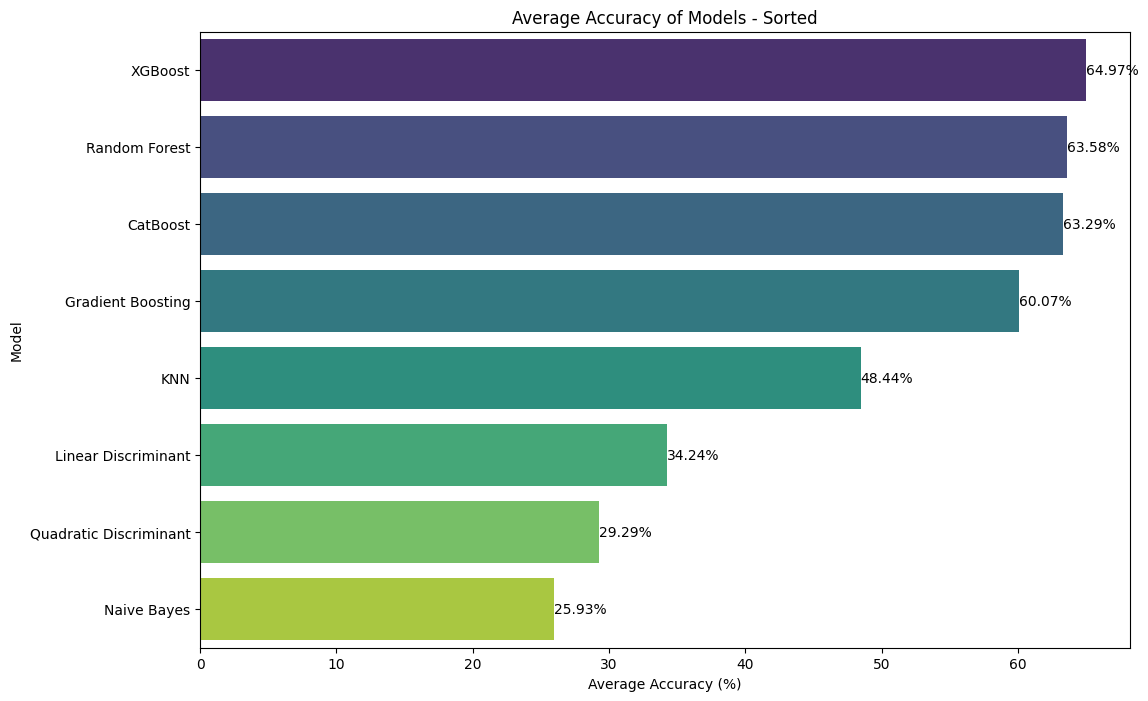

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Average Accuracy', y='Model', data=df_results_sorted, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Average Accuracy (%)')
plt.ylabel('Model')
plt.title('Average Accuracy of Models - Sorted')

# Añadir el porcentaje en cada barra
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}%', ha='left', va='center')

plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Supongamos que X_train, X_test, y_train, y_test ya están definidos

# Crear e ajustar el modelo XGBoost
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model_xgb.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Métricas de clasificación
class_report = classification_report(y_test, y_pred)
print("\nReporte de Clasificación:")
print(class_report)


Matriz de Confusión:
[[113   3  10  33]
 [ 10   4   0   0]
 [  4   0  66  27]
 [ 29   0  29  76]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       159
           1       0.57      0.29      0.38        14
           2       0.63      0.68      0.65        97
           3       0.56      0.57      0.56       134

    accuracy                           0.64       404
   macro avg       0.62      0.56      0.58       404
weighted avg       0.64      0.64      0.64       404



INTERPRETABILIDAD

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 9.6 MB/s eta 0:00:00


[22:22:50] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


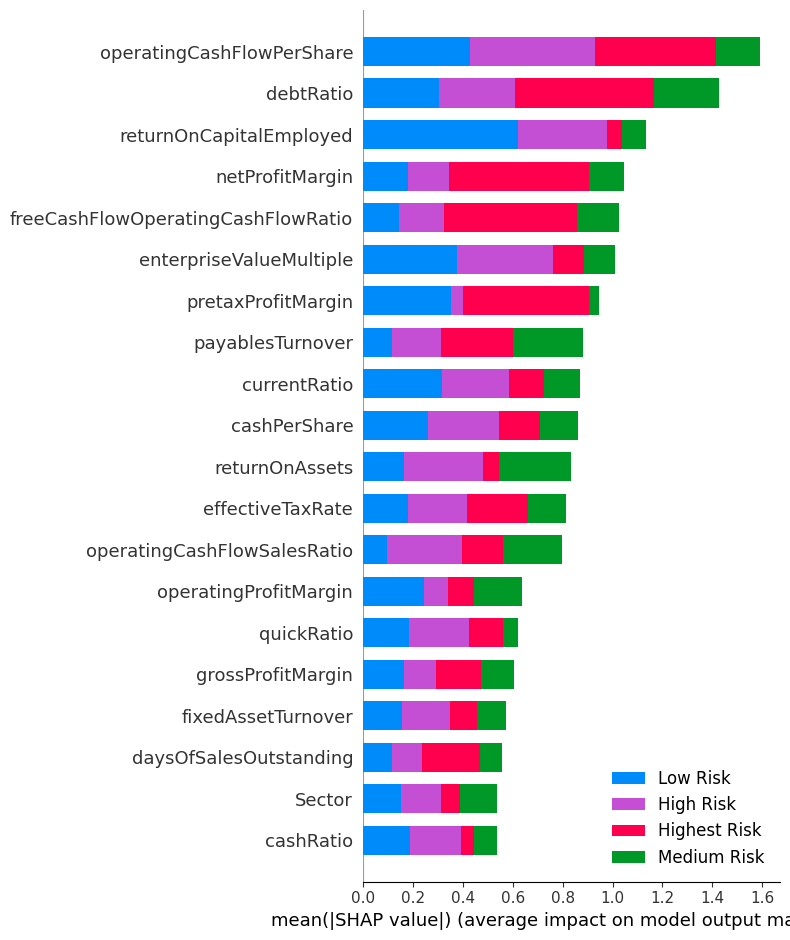

In [ ]:
import shap
import matplotlib.pyplot as plt

# Crear un explainer con tu modelo entrenado
explainer = shap.Explainer(model_xgb)

# Calcular los valores SHAP para tus datos de prueba
shap_values = explainer.shap_values(X_test)

# Obtener las etiquetas originales
original_labels = {
    0: 'High Risk',
    1: 'Highest Risk',
    2: 'Low Risk',
    3: 'Medium Risk'
}

# Crear el gráfico SHAP con un ancho mayor
plt.figure(figsize=(20, 15))
shap.summary_plot(shap_values, X_test, class_names=list(original_labels.values()), show=False)

plt.show()


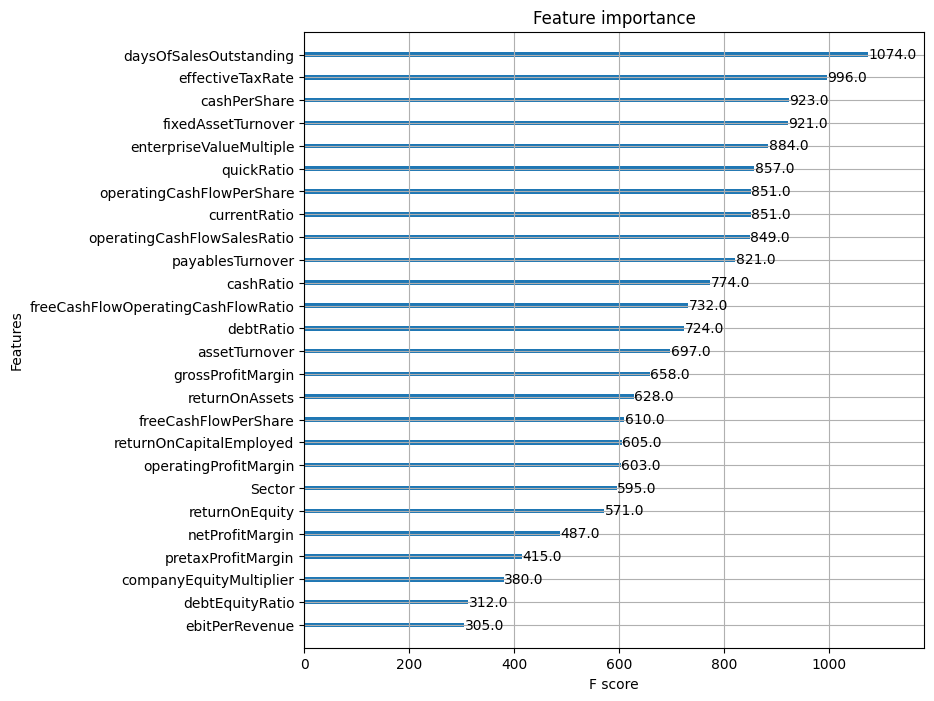

In [ ]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(8, 8))
# xgboost.plot_importance(..., ax=ax)

plot_importance(model, ax=ax)
plt.show()